No reaktivation
With reaktivation


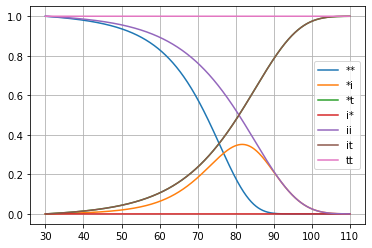

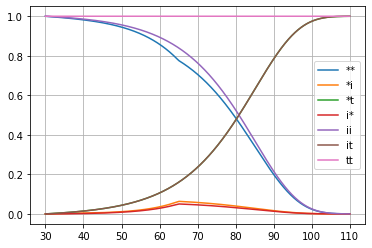

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def rkstep(f,t,y,deltat):
	 k=deltat * f(t,y)
	 ktot= k
	 k=deltat * f(t+deltat/2.,y+k/2.)
	 ktot+=k
	 k=deltat * f(t+deltat/2.,y+k/2.)
	 ktot+=k
	 k=deltat * f(t+deltat,y+k)
	 ktot+=k
	 ynext = y + 1./6 * ktot
	 return(ynext)
	 
def rkstep2(f,t,y,deltat):
		k=[]
		k.append(deltat * f(t,y))
		k.append(deltat * f(t+deltat/2.,y+deltat * k[0]/2.))
		k.append(deltat * f(t+deltat/2.,y+deltat * k[1]/2.))
		k.append(deltat * f(t+deltat,y+deltat * k[2]))
		ynext = y + 1./6 * sum(k)
		return(ynext)
	 
def rk(f,y0,t0,t1,dt):
		xvect=[]
		yvect=[]
		t=t0
		y=y0
		while(t<t1):
			xvect.append(t)
			yvect.append(y)	
			y = rkstep2(f,t,y,dt)
			t += dt
		xvect.append(t)
		yvect.append(y)
		return(xvect,yvect) 	
	 
def plotrk(f,y0,t0,t1,dt,legend=None,fignr=1):
		x,y = rk(f,y0,t0,t1,dt)
		plt.figure(fignr)
		plt.plot(x,y[:])
		plt.grid(True)
		if legend:
			plt.legend(legend)

	 	
def f1(t,x):
	return(np.array([x[0],t]))

def mu(t):
	return(0.0005+10**(0.038*t-4.12))

def sigma(t):
	return(0.0004+10**(0.06*t-5.46))
	

def fInvaliditaet(t,x):
	w=[]
	mut = mu(t)
	sit = sigma(t)
	w.append(-x[0]*(mut+sit))
	w.append(-x[1]*(mut)+x[0]*(sit))
	w.append((x[0]+x[1])*mut)
	w.append(0)
	w.append(-x[4]*mut)
	w.append(x[4]*mut)
	w.append(0)
	return(np.array(w))

def fInvaliditaetReakt(t,x):
	w=[]
	mut = mu(t)
	sit = sigma(t)
	reakt=min(1-mut,0.15)
	if t>= 65: 
		reakt = 0.
		sit = 0.
	w.append(-x[0]*(mut+sit)+x[1]*reakt)
	w.append(-x[1]*(mut+reakt)+x[0]*(sit))
	w.append((x[0]+x[1])*mut)
	w.append(-x[3]*(mut)+x[1]*reakt)
	w.append(-x[4]*mut)
	w.append(x[4]*mut)
	w.append(0)
	return(np.array(w))

t0=30
t1=110
dt=0.01
y0=np.array([1,0,0,0,1,0,1])
legend=["**","*i","*t","i*","ii","it","tt"]

print("No reaktivation")

plotrk(fInvaliditaet,y0,t0,t1,dt,legend=legend,fignr=1)

print("With reaktivation")

plotrk(fInvaliditaetReakt,y0,t0,t1,dt,legend=legend,fignr=2)

**Want to solve**

\begin{eqnarray*}
\frac{\partial \vec{W}(t)}{\partial t} & = & f(\vec{W}(t), t)
\end{eqnarray*}